In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:\\Users\\muzzl\\Downloads\\train_house.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns #To show how many features about house we have
#for building a model of machine learning, we need to consider in advance what is x and what is y
#from the feature "MSSubClass" to "SaleCondition", there are 79 features can be used as X
#"SalePrice" can be viewed as y

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Preprocessing

In [6]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 1]).index,axis=1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [8]:
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [9]:
train.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 63, dtype: object

In [10]:
columnList=train.columns.tolist()
temp=[]
for column in columnList:
    if train[column].dtypes!="int64":
        temp.append(column)      
print(temp)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [11]:
len(temp)

28

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for column in temp:
    new=encoder.fit_transform(train[column].values)
    train[column]=new
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [13]:
y=train['SalePrice']
X=train.drop(['Id','SalePrice'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
predictions=lr.predict(X_test)
predictions

array([ 61310.74998499, 148316.34392962, 114783.70074433, 178615.40459406,
        67414.06423201,  47128.30398195, 245483.38524481, 248094.33792602,
       287574.21837139, 136672.9699301 , 154789.06692169, 206341.08886947,
       208448.97829475, 216079.10643498, 237027.52616998, 161038.44246805,
       213391.92427076, 108242.86793509, 136355.42853008, 233083.96492761,
       181561.34129071, 211361.31613956, 110518.97748588, 227173.54851069,
       210135.30754428, 167885.29384496, 204921.57106994,  82027.56785383,
       168540.68582292,  27838.58974143, 153717.64586428, 267361.46382981,
       202493.60364235,  93483.2948513 , 121723.82033499, 203379.26521246,
       119638.22687399, 215691.39615851, 132007.42935976,  94170.23806081,
       123573.51799166, 255645.23087088,  28543.00260943, 325366.18300014,
       281655.81210098, 151181.2036607 ,  76127.49714345, 137476.60715437,
       398555.39730131, 199392.35904364, 309302.11984447,  87553.71504856,
        86717.17637925, 1

In [77]:
output=pd.DataFrame({'ActualPrice':y_test,'PredictPrice':predictions})

In [79]:
output=output.reset_index()
output.drop(['index'],axis=1)

,ActualPrice,PredictPrice
0,72500,61310.749985
1,153500,148316.343930
2,115000,114783.700744
3,159000,178615.404594
4,84000,67414.064232
...,...,...
433,139000,125501.805903
434,126175,109635.124131
435,84500,45441.799938
436,110000,151210.304470


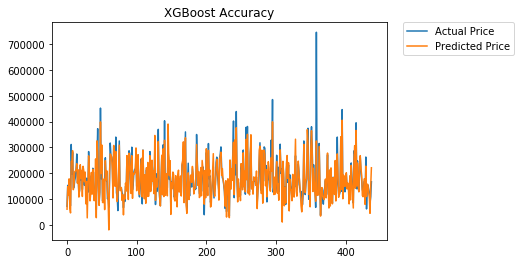

In [80]:
plt.title('XGBoost Accuracy')
plt.plot(output['ActualPrice'], label = 'Actual Price')
plt.plot(output['PredictPrice'], label = 'Predicted Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# XGBoost

In [19]:
from xgboost import XGBRegressor
xgb= XGBRegressor()
xgb.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
predictionxgb = xgb.predict(X_test)
xgb_output=pd.DataFrame({'ActualPrice':y_test,'PredictPrice':predictionxgb})

In [73]:
xgb_output=xgb_output.reset_index()
xgb_output.drop(['index'],axis=1)

,ActualPrice,PredictPrice
0,72500,86356.437500
1,153500,157491.703125
2,115000,107673.765625
3,159000,159411.234375
4,84000,87392.703125
...,...,...
433,139000,136396.093750
434,126175,115352.265625
435,84500,82244.242188
436,110000,141887.703125


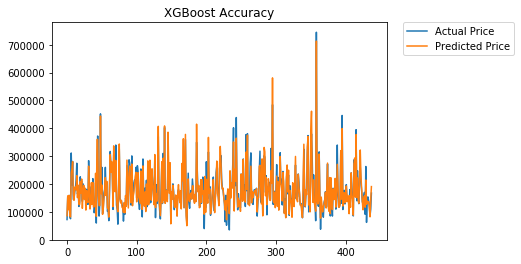

In [74]:
plt.title('XGBoost Accuracy')
plt.plot(xgb_output['ActualPrice'], label = 'Actual Price')
plt.plot(xgb_output['PredictPrice'], label = 'Predicted Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# RandomForestRegression

In [22]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

C:\Users\muzzl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
predictionregr = regr.predict(X_test)
regr_output=pd.DataFrame({'ActualPrice':y_test,'PredictPrice':predictionregr})

In [69]:
regr_output=regr_output.reset_index()
regr_output.drop(['index'],axis=1)

,ActualPrice,PredictPrice
0,72500,67217.6
1,153500,137280.0
2,115000,115425.0
3,159000,137900.0
4,84000,81930.0
...,...,...
433,139000,136330.0
434,126175,122800.0
435,84500,78090.0
436,110000,131165.0


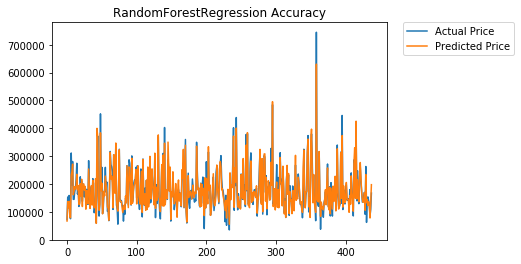

In [71]:
plt.title('RandomForestRegression Accuracy')
plt.plot(regr_output['ActualPrice'], label = 'Actual Price')
plt.plot(regr_output['PredictPrice'], label = 'Predicted Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

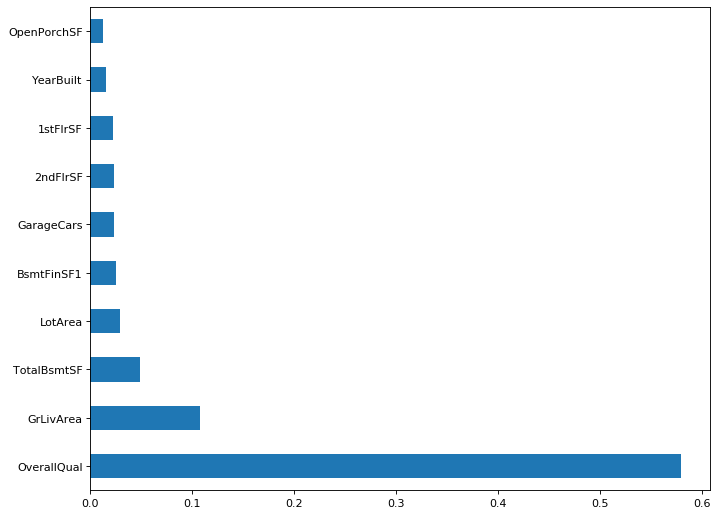

In [90]:
# Feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(regr.feature_importances_, index= X.columns)

feat_importances.nlargest(10).plot(kind='barh')

# ANN

In [25]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(28, activation='relu'))
model.add(Dense(14, activation='relu'))
#model.add(Dense(7, activation='relu'))         
model.add(Dense(1))         
model.compile(optimizer='adam',loss='mse')

In [26]:
#model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),epochs=250)
model.fit(x=X_train, y=y_train,epochs=50)

Epoch 1/50
32/32 [==============================] - 0s 4ms/step - loss: 38387355648.0000
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 36721389568.0000
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 34185832448.0000
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 30371131392.0000
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 25137205248.0000
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 19172509696.0000
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 13778377728.0000
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 10331832320.0000
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 8613476352.0000
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 7768102912.0000
Epoch 11/50
32/32 [==============================] - 0s 1ms/step - loss: 7241328640.0000
Epoch 12/50
32/32 [===

In [27]:
predictionmodel = model.predict(X_test)

In [28]:
temp=[] #This is the process to change 2D to 1D
for element in predictionmodel:
    for num in element:
        temp.append(num)
len(temp)

438

In [68]:
model_output=pd.DataFrame({'ActualPrice':y_test,'PredictPrice':temp})

In [65]:
model_output=model_output.reset_index()
model_output.drop(['index'],axis=1)

,ActualPrice,PredictPrice
0,72500,95775.335938
1,153500,205570.703125
2,115000,147483.171875
3,159000,183499.484375
4,84000,108110.929688
...,...,...
433,139000,156142.953125
434,126175,165031.828125
435,84500,98117.093750
436,110000,151077.843750


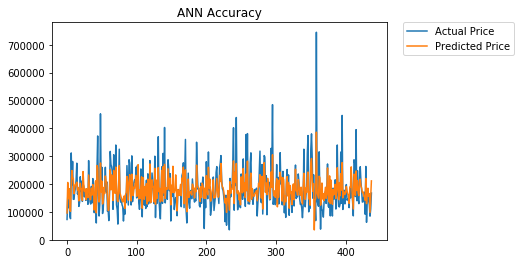

In [67]:
plt.title('ANN Accuracy')
plt.plot(model_output['ActualPrice'], label = 'Actual Price')
plt.plot(model_output['PredictPrice'], label = 'Predicted Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\muzzl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\muzzl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\muzzl\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [82]:
predictionlgr=lgr.predict(X_test)
lgr_output=pd.DataFrame({'ActualPrice':y_test,'PredictPrice':predictionlgr})

In [83]:
lgr_output=lgr_output.reset_index()

In [84]:
lgr_output.drop(['index'],axis=1)

,ActualPrice,PredictPrice
0,72500,110000
1,153500,108500
2,115000,87000
3,159000,117000
4,84000,108000
...,...,...
433,139000,135000
434,126175,110500
435,84500,95000
436,110000,163000


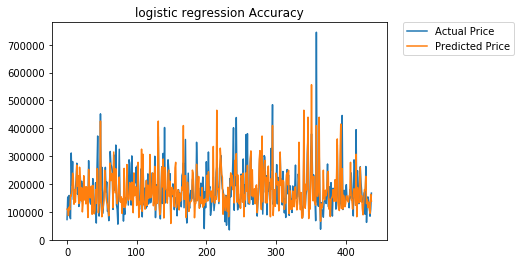

In [86]:
plt.title('logistic regression Accuracy')
plt.plot(lgr_output['ActualPrice'], label = 'Actual Price')
plt.plot(lgr_output['PredictPrice'], label = 'Predicted Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()